In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import filters, io, transform, exposure, morphology, segmentation
from pandas import DataFrame as df
from skimage.feature import canny
from scipy import ndimage as ndi

In [110]:
imc = skimage.io.imread_collection("Pict_2*")

In [111]:
im = imc[0]

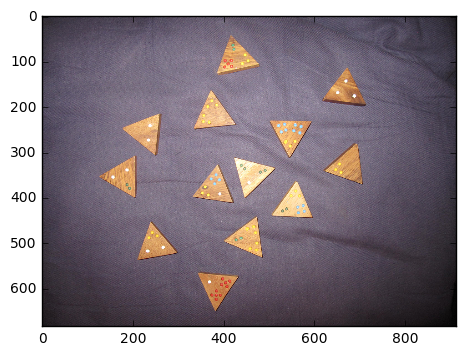

In [112]:
plt.imshow(im)

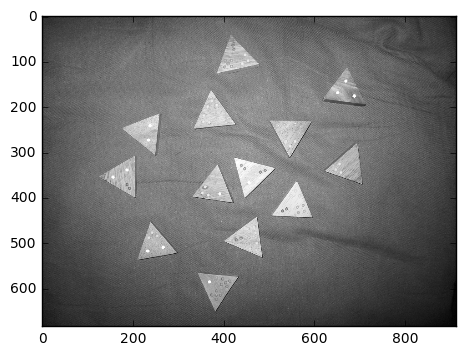

In [113]:
# colors from color picker
im_gray = (127. * im[:,:,0] + 71. * im[:, :, 1] + 35. * im[:, :, 2]) / 255
#im_gray = skimage.exposure.equalize_hist(im_gray)
plt.imshow(im_gray, cmap = 'gray')

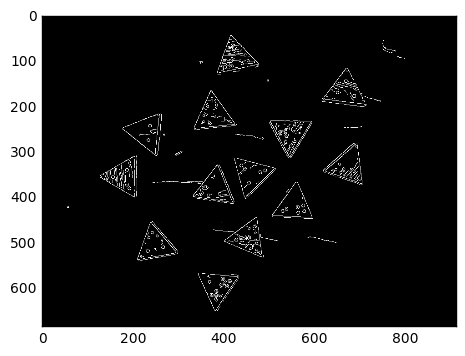

In [114]:
im_edges = canny(im_gray / 255.)
plt.imshow(im_edges, cmap='gray')

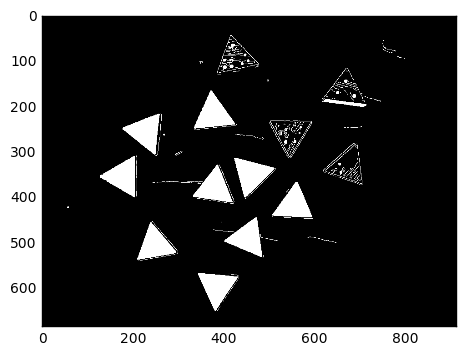

In [115]:
im_filled = ndi.binary_fill_holes(im_edges)
plt.imshow(im_filled, cmap='gray')

In [116]:
labels, _ = ndi.label(im_filled)
sizes = np.bincount(labels.ravel())
mask_sizes = sizes > 3000
mask_sizes[0] = 0
im_cleaned = mask_sizes[labels]
labels, idx = ndi.label(im_cleaned)

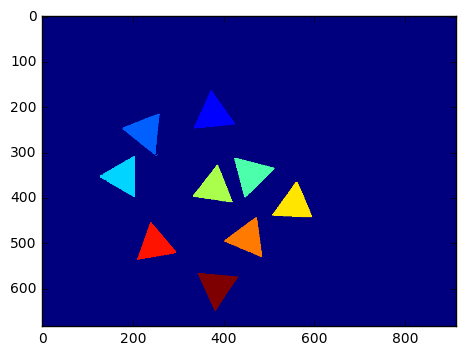

In [117]:
plt.imshow(labels)

In [120]:
def get_range(labels, label):
    v = np.where(labels == label)
    return(np.min(v[0]), np.max(v[0]), np.min(v[1]), np.max(v[1]))
def get_center(r):
    return(np.mean([r[0], r[1]]), np.mean([r[2], r[3]]))

(207.5, 378.5)
(263.0, 217.5)
(355.0, 165.5)
(357.5, 466.0)
(370.0, 375.0)
(405.5, 549.5)
(488.0, 441.5)
(496.5, 251.5)


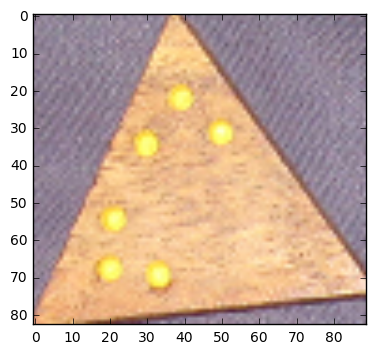

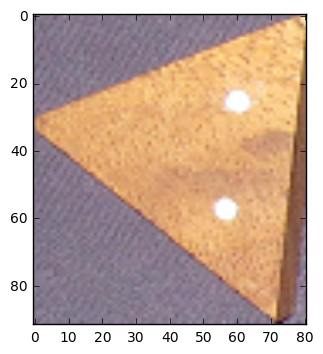

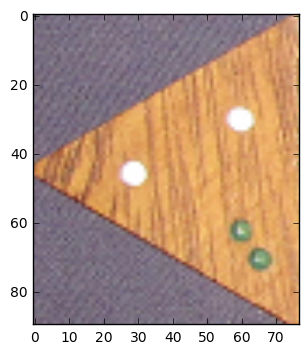

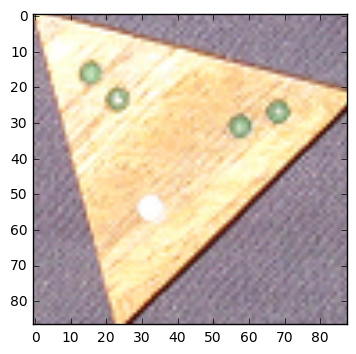

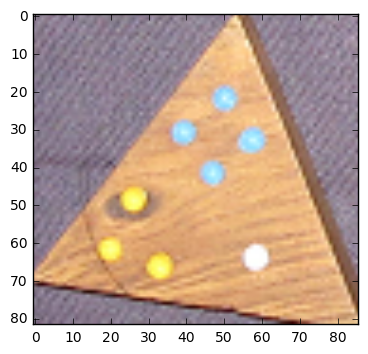

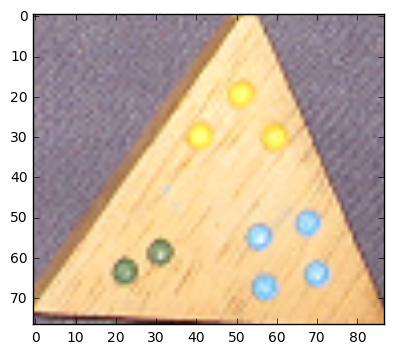

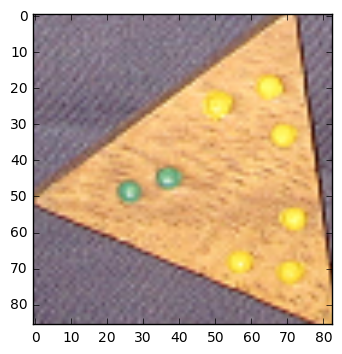

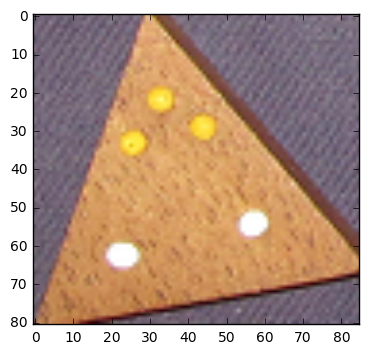

In [121]:
for label in range(1, idx):
    r = get_range(labels, label)
    print get_center(r)
    plt.figure(label)
    plt.imshow(im[r[0]:r[1], r[2]:r[3]], cmap='gray')

In [126]:
from skimage import transform as tf
from skimage import draw
img = np.zeros((120, 100), dtype=int)
radius, x_0, y_0 = (20, 99, 50)
y, x = draw.circle_perimeter(y_0, x_0, radius)
img[x, y] = 1
hspaces = tf.hough_circle(img, radius)
accum, cx, cy, rad = hough_circle_peaks(hspaces, [radius,])


NameError: name 'hough_circle_peaks' is not defined